In [1]:
!pip install --upgrade pip
!pip install xlrd
!conda update pandas -y

  Using cached https://files.pythonhosted.org/packages/5f/25/e52d3f31441505a5f3af41213346e5b6c221c9e086a166f3703d2ddaf940/pip-18.0-py2.py3-none-any.whl
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1
  Using cached https://files.pythonhosted.org/packages/07/e6/e95c4eec6221bfd8528bcc4ea252a850bffcc4be88ebc367e23a1a84b0bb/xlrd-1.1.0-py2.py3-none-any.whl
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.4
  latest version: 4.5.9

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs: 
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-0.23.4              |   py36hf8a1672_0        27.8 MB  conda-forge

The following packages will be UPDATED:

    pandas: 0.23.1-py36h

In [2]:
# Import things and run data file

In [3]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap

In [4]:
dfs = pd.ExcelFile("raw_survey_data.xlsx")

In [5]:
dfs = dfs.parse()

In [6]:
# Getting the extra variables only

In [7]:
extra_variables = dfs.iloc[:,-65:]

In [8]:
IV = dfs.iloc[:,14:17]

In [9]:
IVandDV = pd.concat([IV, extra_variables], axis=1, join_axes=[IV.index])

In [10]:
# Clone the data

In [11]:
Newdf = IVandDV.copy()
Newdf = Newdf.apply(lambda x: x.astype(str).str.lower())

In [12]:
# Grouping technology together

In [13]:
Department = Newdf.iloc[:,0]

In [14]:
Department = Department.replace(["technolgy", "tis", "technology/solutions delivery/web apps", "solutions delivery", "technology and obs", "office of the cio", "i&o", "technology in product creation", "solutions delivery, technology information services", "technology -> government services", "operations"],"technology")

In [15]:
# Grouping science together

In [16]:
Department = Department.replace(["climate science", "weather science it", "obs r&d", "applied science", "business group"],"science")

In [17]:
# Grouping rest together

In [18]:
Department = Department.replace("cfo","other")

In [19]:
departments = ['technology', 'science', 'other']
maindepartments = ['technology', 'science']

In [20]:
#Zipping it back
Newdf['1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?'] = Department

In [21]:
# Cleaning the team variable

In [22]:
Newdf = Newdf.replace(['netowrk services', 'networks services'], 'network services')
Newdf = Newdf.replace(['security testing', 'cyber, security and resilience - business continuity', 'cyber security and resilience'], 'security')
Newdf = Newdf.replace(['solutions delivery - data services', 'solutions delivery > government services', 'government technology', 'defence'], 'solutions delivery')
Newdf = Newdf.replace(['ccc', 'cloud  capability', 'cloud capabilities', 'cloud capability catalogue - arcus squad', 'cloud capability', 'i & oforecasting applications support', 'i&o', 'i&o architecture', 'i&o cloud capability', 'infrastructure', 'network services', 'underpinning capability', 'cloudops', 'cloud ops'], 'infrastructure and operations')
Newdf = Newdf.replace('obs', 'observations')
Newdf = Newdf.replace('the informatics lab', 'informatics lab')
Newdf = Newdf.replace(['tis   data services', 'tis - data services', 'data services', 'aardwolf', 'awesome', 'rru', 'alchemy', 'geoapps', 'geospatial applications - kraken squad', 'moose', 'metdb', 'plans and performance', 'avd (analysis, visualisation and data)', 'avd', 'avd (within tis)', 'analysis, visualisation and data', 'broadcast graphics team'], 'technology and information service')
Newdf = Newdf.replace(['hpc & collaboration', 'hpc team'], 'high performance computing')

In [23]:
Newdf = Newdf.replace(['climate', 'climate information for international development', 'climate science it (data delivery)', 'understanding climate change', 'mdvp operational systems', 'it apps', 'crum'], 'climate science')
Newdf = Newdf.replace(['hpc optimisation team', 'hpc optimisation', 'high performance computing optimisation'], 'high performance computing')
Newdf = Newdf.replace(['vipp', 'weather science verification, impacts, and post-processing - specifically, post-processing and verification systems', 'verification, impacts and post-processing', 'weather science it', 'modelling infrastructure support systems a.k.a. fcm, rose, cylc, team', 'satellite applications', 'convective-scale data assimilation and ensembles'], 'weather science')
Newdf = Newdf.replace(['sferics', 'atmospheric processes and parameterizations'], 'atmostpheric science')
Newdf = Newdf.replace(['research to operations', 'aviation applications'], 'applied science')
Newdf = Newdf.replace(['met research unit / obr / foundation science', 'ofrd', 'property management', 'public website', 'digital'], 'other')
Newdf['2 : Where do you work within the Met Office hierarchy? - What team do you work in within that department?'] = Newdf['2 : Where do you work within the Met Office hierarchy? - What team do you work in within that department?'].replace('nan', 'other')

In [24]:
Department_summary = Newdf['1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?'].value_counts().to_frame("Department")

In [25]:
departmenttuples = list(zip(Department_summary.index, Department_summary['Department']))
departmenttuples

[('technology', 68), ('science', 26), ('other', 1)]

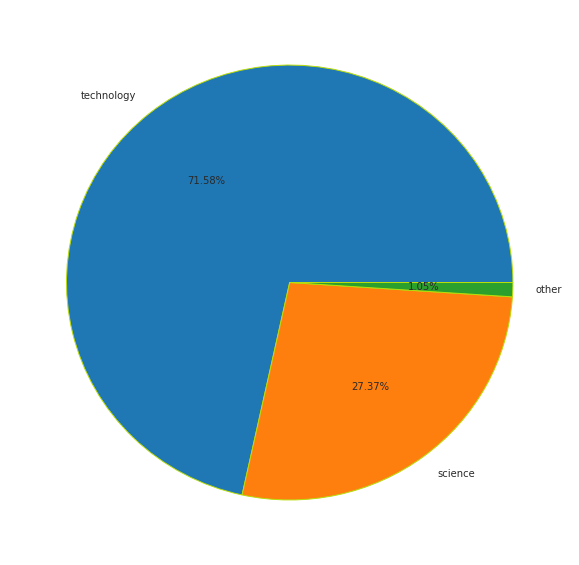

In [26]:
fig = plt.figure(figsize=(10,10))
plt.pie(Department_summary, autopct='%1.2f%%', labels=list(Department_summary.index), wedgeprops={'edgecolor': '#B9DC0C'}, textprops={'color': '#2A2A2A'})
plt.savefig(fname="department.png", dpi=350, bbox_inches="tight")

In [27]:
Team_summary = Newdf['2 : Where do you work within the Met Office hierarchy? - What team do you work in within that department?'].value_counts().to_frame()
Team_summary

,2 : Where do you work within the Met Office hierarchy? - What team do you work in within that department?
technology and information service,23
infrastructure and operations,16
solutions delivery,9
climate science,8
weather science,7
other,6
applied science,5
platforms,4
informatics lab,4
high performance computing,4


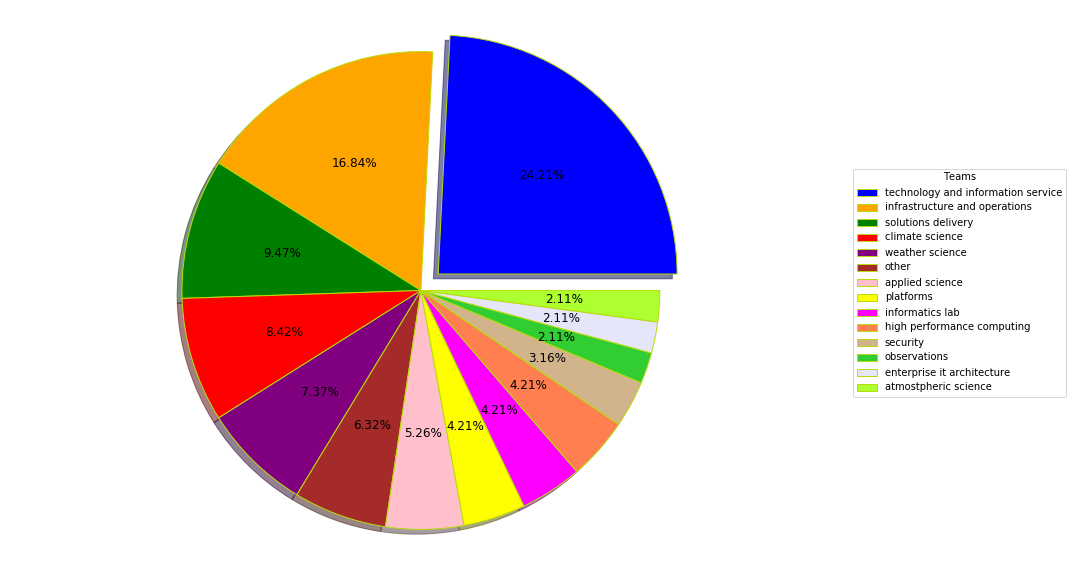

In [28]:
fig = plt.figure(figsize=(15,10))
wedges, texts, autotexts = plt.pie(Team_summary, autopct='%1.2f%%', colors=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'yellow', 'magenta', 'coral', 'tan', 'limegreen', 'lavender', 'greenyellow'], wedgeprops={'edgecolor': '#B9DC0C'}, textprops={'color': 'black', 'fontsize':12}, explode=[0.1,0,0,0,0,0,0,0,0,0,0,0,0,0], shadow=True)
plt.axis('equal')
plt.legend(wedges, Team_summary.index, title="Teams", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.savefig(fname="team.png", dpi=350, bbox_inches="tight")

In [29]:
def valuecount_by_department(department, column):
    countframe = pd.DataFrame(Newdf.loc[Newdf['1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?'] == department])[column].value_counts(dropna=True, sort=True).to_frame(department)
    return countframe

In [30]:
def percentage_by_department(departmenttuple, column):
    department, total = departmenttuple
    countarray = pd.DataFrame(Newdf.loc[Newdf['1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?'] == department])[column].value_counts(dropna=True, sort=True)
    percentagearray = countarray*100/total
    percentageframe = percentagearray.to_frame(department)
    return percentageframe

In [31]:
#Writing functions

In [32]:
def plot_dataframe(dataframe, title):
    fig = dataframe.plot.bar(grid=True, label=True, edgecolor= '#B9DC0C', linewidth=2, figsize=(15,10))
    fig.set_facecolor('#2A2A2A')
    plt.xlabel('Department')
    plt.ylabel('Number of responses')
    plt.title(title)
    plt.xticks(rotation='horizontal')
    picturename = title + ".png"
    plt.savefig(fname=picturename, dpi=350, bbox_inches="tight")

In [33]:
def plot_stacked(dataframe, title):
    fig = dataframe.plot.bar(grid=True,
                             stacked=True, label=True, edgecolor= '#B9DC0C', linewidth=2, figsize=(15,10))
    normallabels = list(dataframe.index)
    wrappedlabels = [ '\n'.join(wrap(l, 15)) for l in normallabels ]
    fig.set_xticklabels(wrappedlabels)
    plt.xticks(rotation='horizontal')
    plt.ylabel('Number of responses')
    fig.set_facecolor('#2A2A2A')
    plt.title(title)
    picturename = title + ".png"
    plt.savefig(fname=picturename, dpi=350, bbox_inches="tight")

In [34]:
def plot_1way(dataframe, title):
    fig = dataframe.plot.bar(grid=True, stacked=True, label=True, color= '#B9DC0C', figsize=(15,10), legend=False)
    fig.set_facecolor('#2A2A2A')
    normallabels = list(dataframe.index)
    wrappedlabels = [ '\n'.join(wrap(l, 20)) for l in normallabels ]
    fig.set_xticklabels(wrappedlabels)
    plt.xticks(rotation='horizontal')
    plt.title(title)
    picturename = title + ".png"
    plt.savefig(fname=picturename, dpi=350, bbox_inches="tight")

In [35]:
technology_hobby = valuecount_by_department('technology', '21 : Do you work with technology as a hobby outside work?')
science_hobby = valuecount_by_department('science', '21 : Do you work with technology as a hobby outside work?')
hobby_summary = pd.concat([technology_hobby, science_hobby], axis=1)
hobby_summary = hobby_summary.iloc[:2, :]
hobby_summary = pd.DataFrame.transpose(hobby_summary)
hobby_summary

,yes,no
technology,52,14
science,15,9


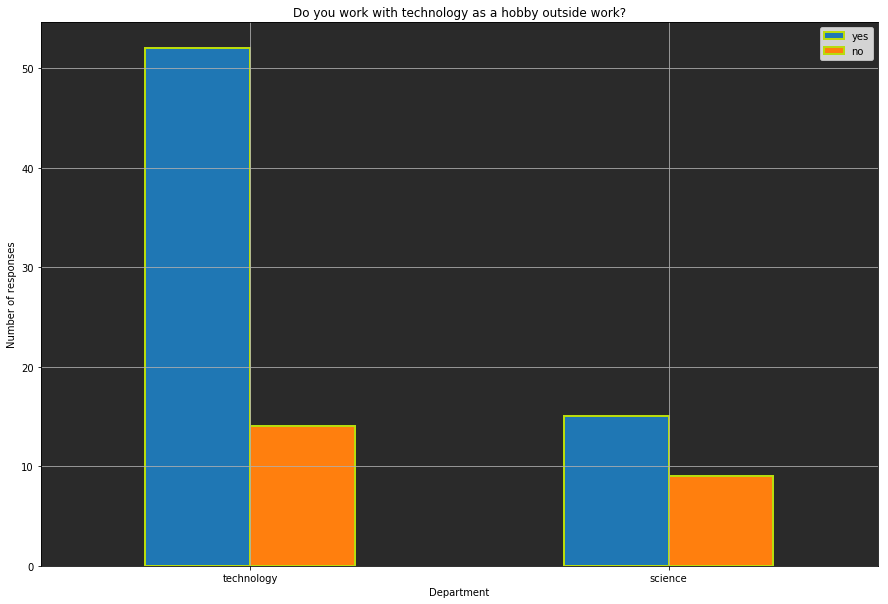

In [36]:
plot_dataframe(hobby_summary, 'Do you work with technology as a hobby outside work?')

In [37]:
# Dealing with highest qualification

In [38]:
other_qualification = Newdf.loc[Newdf['25 : What is your highest level of academic qualification?'] == 'other, please specify']

In [39]:
listed_qualification = Newdf.loc[Newdf['25 : What is your highest level of academic qualification?'] != 'other, please specify']

In [40]:
other_qualification = other_qualification.replace('higher national certificate', 'hnc')

In [41]:
hnc = other_qualification.loc[other_qualification['25 : What is your highest level of academic qualification?Other, please specify comment'] == 'hnc']

hnc = hnc.replace('other, please specify', 'higher national certificate')

In [42]:
btec = other_qualification.loc[other_qualification['25 : What is your highest level of academic qualification?Other, please specify comment'] == 'btec']

btec = btec.replace('other, please specify', 'btec')

In [43]:
professional_qualifications = other_qualification.loc[other_qualification['25 : What is your highest level of academic qualification?Other, please specify comment'] == 'professional qualifications']

professional_qualifications = professional_qualifications.replace('other, please specify', 'professional qualifications')

In [44]:
hnd = other_qualification.loc[other_qualification['25 : What is your highest level of academic qualification?Other, please specify comment'] == 'hnd']

hnd = hnd.replace('other, please specify', 'higher national diploma')

In [45]:
Newdf = pd.concat([listed_qualification, hnc, btec, professional_qualifications, hnd])

In [46]:
Newdf = Newdf.drop(labels = ['25 : What is your highest level of academic qualification?Other, please specify comment'], axis = 1)

In [47]:
Newdf = Newdf.replace(['gcse/o-level', 'btec'], '1. secondary level')
Newdf = Newdf.replace(['as/a-level', 'higher national certificate', 'higher national diploma'], '2. pre-university level')
Newdf = Newdf.replace("bachelor's degree", '3. undergraduate level')
Newdf = Newdf.replace("master's degree", "4. postgraduate level - master's")
Newdf = Newdf.replace("doctoral degree", "5. postgraduate level - doctoral")
Newdf = Newdf.replace("professional qualifications", "6. professional qualifications")

In [48]:
technology_qualification = percentage_by_department(departmenttuples[0], '25 : What is your highest level of academic qualification?')
science_qualification = percentage_by_department(departmenttuples[1], '25 : What is your highest level of academic qualification?')
others_qualification = percentage_by_department(departmenttuples[2], '25 : What is your highest level of academic qualification?')
qualification_summary = pd.concat([technology_qualification, science_qualification], axis=1)
qualification_summary = pd.DataFrame.transpose(qualification_summary)
qualification_summary = qualification_summary.replace('NaN', 0)
qualification_summary = qualification_summary.drop('nan', axis=1)
qualification_summary

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,1. secondary level,2. pre-university level,3. undergraduate level,4. postgraduate level - master's,5. postgraduate level - doctoral
technology,4.411765,23.529412,42.647059,23.529412,2.941176
science,NaN,NaN,NaN,30.769231,69.230769


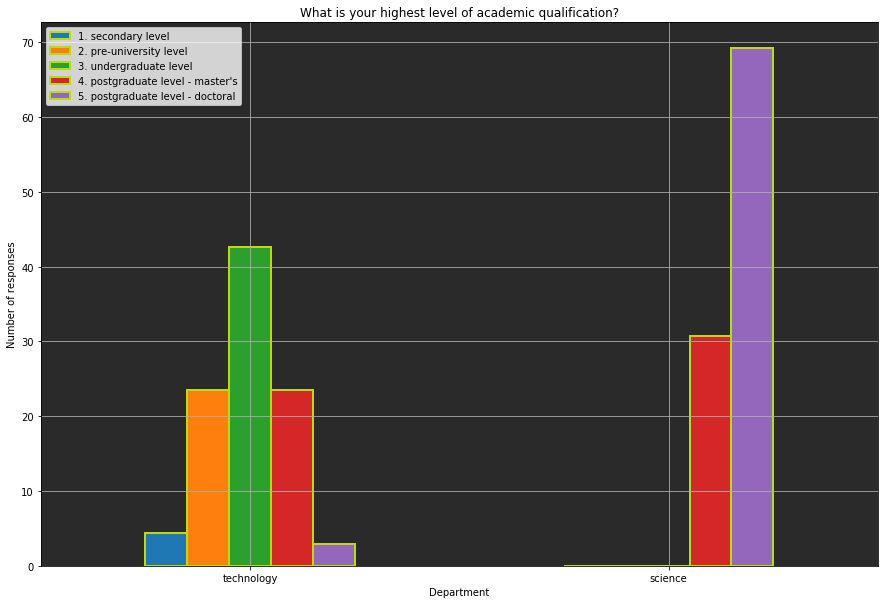

In [49]:
plot_dataframe(qualification_summary, "What is your highest level of academic qualification?")

In [50]:
Newdf.rename(index=str, columns={'26 : If you have a degree, what was your specialism? In cases of multiple degrees, multiple answers may be selected. Computer science, computer engineering, or software engineering': 'Computer science, computer engineering, or software engineering',
                                 '26 : If you have a degree, what was your specialism? In cases of multiple degrees, multiple answers may be selected. Another engineering discipline (eg. civil, electrical, mechanical)': 'Another engineering discipline',
                                 '26 : If you have a degree, what was your specialism? In cases of multiple degrees, multiple answers may be selected. Information systems, information technology, or system administration': 'Information systems, information technology, or system administration',
                                 '26 : If you have a degree, what was your specialism? In cases of multiple degrees, multiple answers may be selected. A natural science (eg. biology, chemistry, physics)': 'A natural science',
                                 '26 : If you have a degree, what was your specialism? In cases of multiple degrees, multiple answers may be selected. Mathematics or statistics': "Mathematics or statistics",
                                 '26 : If you have a degree, what was your specialism? In cases of multiple degrees, multiple answers may be selected. Web development or web design':"Web development or web design",
                                 '26 : If you have a degree, what was your specialism? In cases of multiple degrees, multiple answers may be selected. A business discipline (eg. accounting, finance, marketing)': "A business discipline",
                                 '26 : If you have a degree, what was your specialism? In cases of multiple degrees, multiple answers may be selected. Communications and media': "Communications and media",
                                 '26 : If you have a degree, what was your specialism? In cases of multiple degrees, multiple answers may be selected. A humanities discipline (eg. literature, history, philosophy)': "A humanities discipline",
                                 '26 : If you have a degree, what was your specialism? In cases of multiple degrees, multiple answers may be selected. A social science (eg. anthropology, sociology)': "A social science",
                                 '26 : If you have a degree, what was your specialism? In cases of multiple degrees, multiple answers may be selected. Fine arts or performing arts (eg. graphic design, music, studio art)': "Fine arts or performing arts",
                                 '26 : If you have a degree, what was your specialism? In cases of multiple degrees, multiple answers may be selected. A health science (eg. nursing, radiology)': "A health science",
                                 '26 : If you have a degree, what was your specialism? In cases of multiple degrees, multiple answers may be selected. I do not have a degree': "I do not have a degree",
                                 '26 : If you have a degree, what was your specialism? In cases of multiple degrees, multiple answers may be selected. Other, please specify': 'Other degree',
                                 '26 : If you have a degree, what was your specialism? In cases of multiple degrees, multiple answers may be selected. Other, please specifycomment': 'Specified other degree'}, inplace=True)

In [51]:
list(Newdf.iloc[:, 8:22].columns)

['Computer science, computer engineering, or software engineering',
 'Another engineering discipline',
 'Information systems, information technology, or system administration',
 'A natural science',
 'Mathematics or statistics',
 'Web development or web design',
 'A business discipline',
 'Communications and media',
 'A humanities discipline',
 'A social science',
 'Fine arts or performing arts',
 'A health science',
 'I do not have a degree',
 'Other degree']

In [52]:
def get_specific_degree(departmenttuple):
    department, total = departmenttuple
    specificdict = {} 
    tempdf = Newdf.loc[Newdf['1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?'] == department]
    for column in list(Newdf.iloc[:, 8:22].columns):
        length = len(tempdf.loc[tempdf[column] == "yes"])*100/total  
        specificdict[column] = length
    return specificdict

In [53]:
technologydegree = get_specific_degree(departmenttuples[0])
sciencedegree = get_specific_degree(departmenttuples[1])
othersdegree = get_specific_degree(departmenttuples[2])
degreedict = {'technology': technologydegree, 'science': sciencedegree, 'other': othersdegree}
degreeframe=pd.DataFrame.from_dict(degreedict)
degreeframe = degreeframe.reindex(index=['Computer science, computer engineering, or software engineering',
 'Another engineering discipline',
 'Information systems, information technology, or system administration',
 'A natural science',
 'Mathematics or statistics',
 'Web development or web design',
 'A business discipline',
 'Communications and media',
 'A humanities discipline',
 'A social science',
 'Fine arts or performing arts',
 'A health science',
 'I do not have a degree',
 'Other degree'])
degreeframe = pd.DataFrame.transpose(degreeframe)
degreeframe

,"Computer science, computer engineering, or software engineering",Another engineering discipline,"Information systems, information technology, or system administration",A natural science,Mathematics or statistics,Web development or web design,A business discipline,Communications and media,A humanities discipline,A social science,Fine arts or performing arts,A health science,I do not have a degree,Other degree
technology,44.117647,8.823529,4.411765,20.588235,7.352941,2.941176,1.470588,2.941176,2.941176,1.470588,1.470588,1.470588,8.823529,4.411765
science,26.923077,19.230769,0.000000,80.769231,19.230769,3.846154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.538462
other,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000


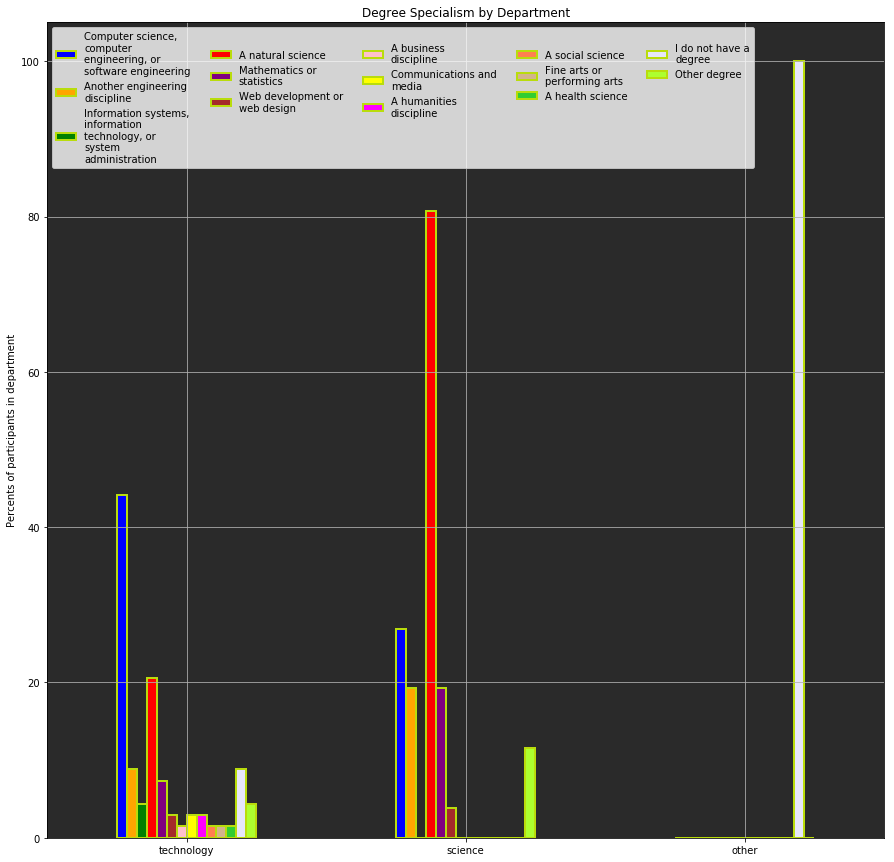

In [54]:
fig = degreeframe.plot.bar(grid=True, label=True, legend=True, edgecolor= '#B9DC0C', linewidth=2, figsize=(15,15), color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'yellow', 'magenta', 'coral', 'tan', 'limegreen', 'lavender', 'greenyellow'])
normallabels = list(degreeframe.columns)
wrappedlabels = [ '\n'.join(wrap(l, 20)) for l in normallabels ]
plt.legend(labels=wrappedlabels, ncol=5, loc='upper left')
plt.xticks(rotation='horizontal')
plt.ylabel('Percents of participants in department')
fig.set_facecolor('#2A2A2A')
plt.title("Degree Specialism by Department")
picturename = "Degree Specialism" + ".png"
plt.savefig(fname=picturename, dpi=350, bbox_inches="tight")

In [55]:
# Wellbeing

In [56]:
Newdf['33 : How much time on average do you spend on a computer per day?'].value_counts()

5 - 8 hours      62
9 - 12 hours     28
1 - 4 hours       4
over 12 hours     1
Name: 33 : How much time on average do you spend on a computer per day?, dtype: int64

In [57]:
Newdf = Newdf.replace('1 - 4 hours', 2.5)
Newdf = Newdf.replace('5 - 8 hours', 6.5)
Newdf = Newdf.replace('9 - 12 hours', 10.5)
Newdf = Newdf.replace('over 12 hours', 18)

In [58]:
Newdf['34 : How much time on average do you spend outside per day?'].value_counts()

1 - 2 hours             41
30 - 59 minutes         35
less than 30 minutes    10
3 - 4 hours              8
nan                      1
Name: 34 : How much time on average do you spend outside per day?, dtype: int64

In [59]:
Newdf = Newdf.replace('less than 30 minutes', 0.5)
Newdf = Newdf.replace('30 - 59 minutes', 0.75)
Newdf = Newdf.replace('1 - 2 hours', 1.5)
Newdf = Newdf.replace('3 - 4 hours', 3.5)

In [60]:
Newdf['35 : How many times do you exercise on average per week?'].value_counts()

1 - 2 times per week          33
3 - 4 times per week          27
daily or almost every day     22
i don't typically exercise     7
1 - 2 times per month          4
nan                            2
Name: 35 : How many times do you exercise on average per week?, dtype: int64

In [61]:
Newdf = Newdf.replace(["i don't typically exercise", "never"], 0)
Newdf = Newdf.replace("1 - 2 times per month", 1)
Newdf = Newdf.replace("1 - 2 times per week", 2)
Newdf = Newdf.replace("3 - 4 times per week", 3)
Newdf = Newdf.replace("daily or almost every day", 4)

In [62]:
Newdf = Newdf.replace('nan', np.nan)
Wellbeingdata = Newdf.iloc[:, -11:-7]
habitcorrelation = Wellbeingdata.corr('pearson')
habitcorrelation

,33 : How much time on average do you spend on a computer per day?,34 : How much time on average do you spend outside per day?,35 : How many times do you exercise on average per week?,36 : How many times on average do you skip a meal to be productive per week?
33 : How much time on average do you spend on a computer per day?,1.000000,0.012485,-0.009185,0.087797
34 : How much time on average do you spend outside per day?,0.012485,1.000000,0.186943,-0.096582
35 : How many times do you exercise on average per week?,-0.009185,0.186943,1.000000,-0.062128
36 : How many times on average do you skip a meal to be productive per week?,0.087797,-0.096582,-0.062128,1.000000


In [63]:
metricslabels = list(Wellbeingdata.columns)
wrappedmetricslabels = [ '\n'.join(wrap(l, 20)) for l in Wellbeingdata ]
wrappedmetricslabels

['33 : How much time\non average do you\nspend on a computer\nper day?',
 '34 : How much time\non average do you\nspend outside per\nday?',
 '35 : How many times\ndo you exercise on\naverage per week?',
 '36 : How many times\non average do you\nskip a meal to be\nproductive per week?']

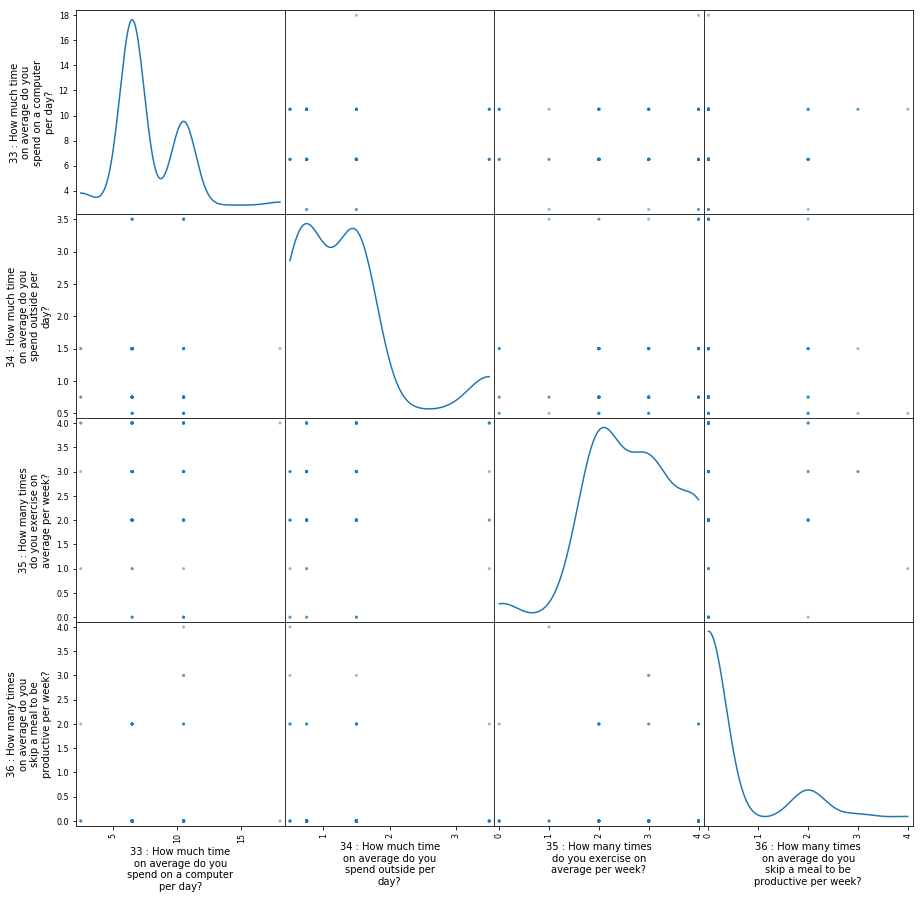

In [64]:
Wellbeingdata.columns = wrappedmetricslabels
pd.plotting.scatter_matrix(Wellbeingdata, figsize=(15,15), diagonal='kde')
plt.savefig('habitautocorrelations.png', dpi=350, bbox_inches='tight')

In [65]:
# Write a function to calculate mean wellbeing indexes for department

In [66]:
def wbdepartment(department):
    return Newdf.loc[Newdf['1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?'] == department].iloc[:, -11:-7].mean().to_frame(department)

In [67]:
technology_wb = wbdepartment('technology')
science_wb = wbdepartment('science')
others_wb = wbdepartment('other')
compare_wellbeing = pd.concat([technology_wb, science_wb], axis=1)
compare_wellbeing = pd.DataFrame.transpose(compare_wellbeing)
compare_wellbeing

,33 : How much time on average do you spend on a computer per day?,34 : How much time on average do you spend outside per day?,35 : How many times do you exercise on average per week?,36 : How many times on average do you skip a meal to be productive per week?
technology,7.669118,1.3125,2.492537,0.373134
science,7.730769,1.2000,2.720000,0.280000


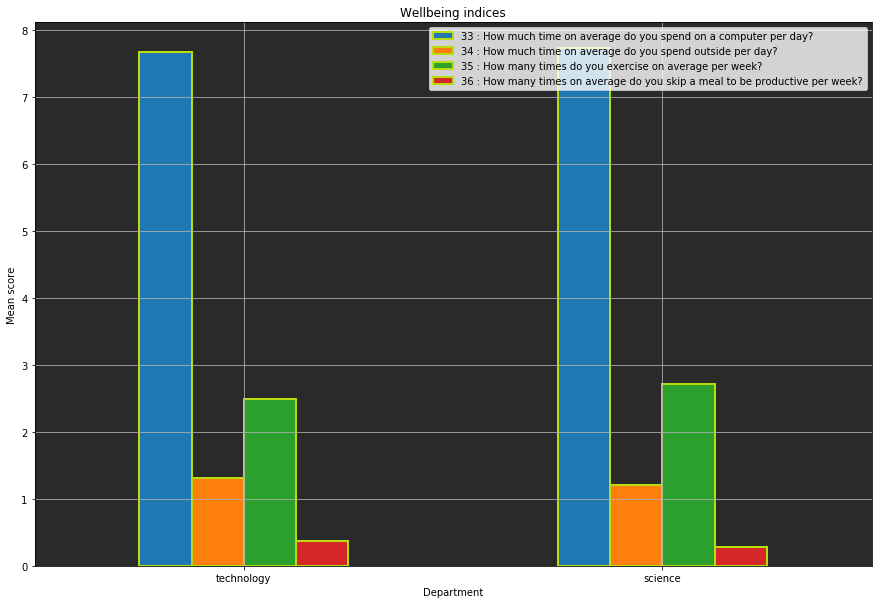

In [70]:
fig = compare_wellbeing.plot.bar(grid=True, label=True, edgecolor= '#B9DC0C', linewidth=2, figsize=(15,10))
fig.set_facecolor('#2A2A2A')
plt.xlabel('Department')
plt.ylabel('Mean score')
plt.title('Wellbeing indices')
plt.xticks(rotation='horizontal')
picturename = 'Wellbeing indices' + ".png"
plt.savefig(fname=picturename, dpi=350, bbox_inches="tight")

In [72]:
Newdf.rename(index=str, columns={'32 : How much do you agree with the following statements: I feel a sense of community with others in my industry.': "I feel a sense of community with others in my industry",'32 : How much do you agree with the following statements: I think of myself as competing with my peers.': "I think of myself as competing with my peers",'32 : How much do you agree with the following statements: I have less technical skill than most of my peers.': "I have less technical skill than most of my peers",'32 : How much do you agree with the following statements: I feel I have the opportunity to learn new skills.': "I feel I have the opportunity to learn new skills",'32 : How much do you agree with the following statements: I think the technology I use at work is suitable for what I do.': "I think the technology I use at work is suitable for what I do"}, inplace=True)

In [73]:
Newdf.columns.values[-16:-11]

array(['I feel a sense of community with others in my industry',
       'I think of myself as competing with my peers',
       'I have less technical skill than most of my peers',
       'I feel I have the opportunity to learn new skills',
       'I think the technology I use at work is suitable for what I do'],
      dtype=object)

In [74]:
Newdf = Newdf.replace('strongly disagree', -2)
Newdf = Newdf.replace('disagree', -1)
Newdf = Newdf.replace('neither agree or disagree', 0)
Newdf = Newdf.replace('agree', 1)
Newdf = Newdf.replace('strongly agree', 2)

In [75]:
statementsrating = Newdf.iloc[:, -16:-11]
#statements = list(statementsrating.columns.values)
#wrappedstatements = [ '\n'.join(wrap(l, 20)) for l in statements ]
#statementsrating.columns = wrappedstatements
#statementsrating

In [76]:
statementsrating.describe()

,I feel a sense of community with others in my industry,I think of myself as competing with my peers,I have less technical skill than most of my peers,I feel I have the opportunity to learn new skills,I think the technology I use at work is suitable for what I do
count,80.00000,80.000000,72.000000,83.000000,79.000000
mean,0.56250,-0.375000,-0.583333,1.024096,0.721519
std,0.88366,1.236318,1.147563,0.680314,0.986274
min,-2.00000,-2.000000,-2.000000,-1.000000,-2.000000
25%,0.00000,-1.000000,-1.000000,1.000000,1.000000
50%,1.00000,-1.000000,-1.000000,1.000000,1.000000
75%,1.00000,1.000000,0.000000,1.000000,1.000000
max,2.00000,2.000000,2.000000,2.000000,2.000000


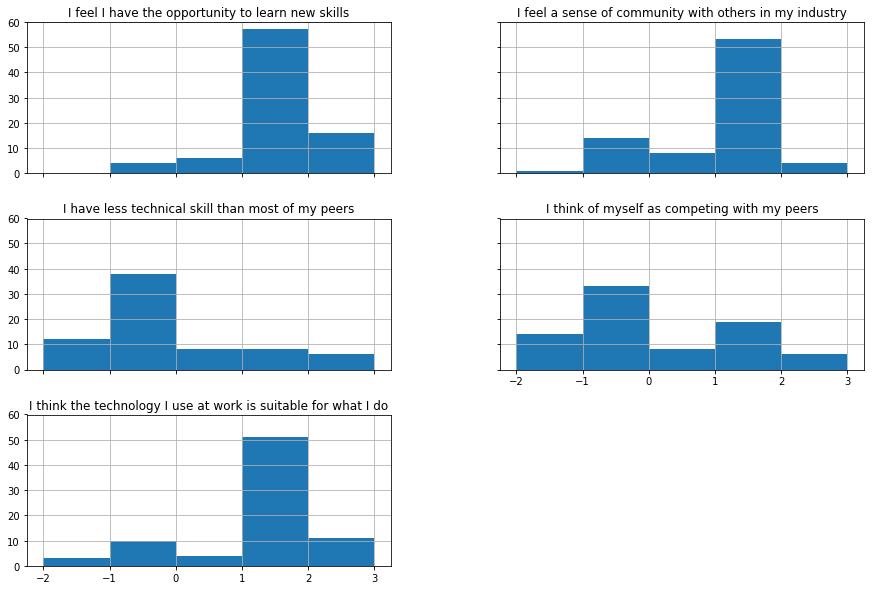

In [77]:
statementsrating.hist(bins=[-2,-1,-1,0,0,1,2,2,3], sharex=True, sharey=True, figsize=(15,10))
plt.savefig('statements.png', dpi=350, bbox_inches='tight')

In [78]:
Newdf.rename(index=str, columns = {'27 : Have you taken part in any other forms of education? Taught yourself a new skill without taking a formal course': "Taught yourself a new skill without taking a formal course",'27 : Have you taken part in any other forms of education? Taken an online course': 'Taken an online course','27 : Have you taken part in any other forms of education? Received on the job training': 'Received on the job training','27 : Have you taken part in any other forms of education? Taken any extracurricular in person course': 'Taken any extracurricular in person course','27 : Have you taken part in any other forms of education? Completed an industry certification programme': 'Completed an industry certification programme','27 : Have you taken part in any other forms of education? I have not taken part in others forms of education': 'I have not taken part in others forms of education','27 : Have you taken part in any other forms of education? Other, please specify': 'Other','27 : Have you taken part in any other forms of education? Other, please specifycomment': 'Specified other'}, inplace=True)

In [79]:
Overall_other_education_summary = {}

In [80]:
# def get_number_of_methods(column):
#     length = len(Newdf.loc[Newdf[column] == "yes"])
#     Overall_other_education_summary[column] = length

In [81]:
# for column in Newdf.iloc[:, -43:-36].columns:
#     get_number_of_methods(column)

In [82]:
# Overall_other_education_summary = pd.DataFrame.from_dict(Overall_other_education_summary, orient='index')

In [83]:
# Overall_other_education_summary

In [84]:
# Overall_other_education_summary.columns = ['']

In [85]:
# plot_1way(Overall_other_education_summary, 'Overall other forms of education - summary')

In [86]:
def get_specific_other_education(department):    
    specificdict = {} 
    tempdf = Newdf.loc[Newdf['1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?'] == department]
    for column in Newdf.iloc[:, -44:-37].columns:
        length = len(tempdf.loc[tempdf[column] == "yes"])  
        specificdict[column] = length
    return specificdict
        

In [87]:
technologydict = get_specific_other_education('technology')
technologyframe = pd.DataFrame.from_dict(technologydict, orient='index')
sciencedict = get_specific_other_education('science')
scienceframe = pd.DataFrame.from_dict(sciencedict, orient='index')
otherdict = get_specific_other_education('other')
otherframe = pd.DataFrame.from_dict(otherdict, orient='index')
othereducationdict = {'technology': technologydict, 'science': sciencedict, 'other': otherdict}
othereducationframe = pd.DataFrame.from_dict(othereducationdict)
othereducationframe.sort_values(["technology"], ascending=False, inplace=True)
othereducationframe

,technology,science,other
Taught yourself a new skill without taking a formal course,55,24,1
Received on the job training,49,21,1
Taken an online course,48,11,1
Completed an industry certification programme,23,4,1
Taken any extracurricular in person course,17,5,1
Other,3,0,0
I have not taken part in others forms of education,0,1,0


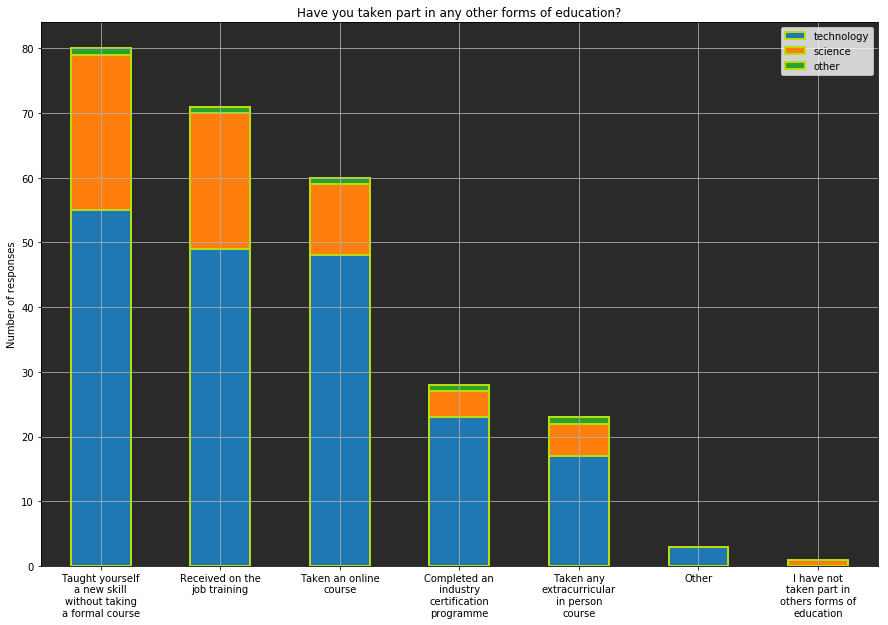

In [88]:
plot_stacked(othereducationframe, 'Have you taken part in any other forms of education?')

In [89]:
Newdf.rename(index=str, columns = {'28 : Do you use any of these methods to learn independently of formal training? The official documentation and/or standards for the technology': "The official documentation and/or standards for the technology", '28 : Do you use any of these methods to learn independently of formal training? A book or e-book': "A book or e-book", '28 : Do you use any of these methods to learn independently of formal training? Internal Met Office documentation or Yammer':"Internal Met Office documentation or Yammer", '28 : Do you use any of these methods to learn independently of formal training? External online communities': "External online communities", "28 : Do you use any of these methods to learn independently of formal training? The technology's online help system": "The technology's online help system", '28 : Do you use any of these methods to learn independently of formal training? Tapping your network of friends and peers versed in the technology': "Tapping your network of friends and peers versed in the technology", '28 : Do you use any of these methods to learn independently of formal training? Pre-scheduled tutoring or mentoring sessions with a colleague': "Pre-scheduled tutoring or mentoring sessions with a colleague", "28 : Do you use any of these methods to learn independently of formal training? I don't use methods to learn independent of formal training": "I don't use methods to learn independent of formal training", '28 : Do you use any of these methods to learn independently of formal training? Other, please specify': "Other independent learning or formal training", '28 : Do you use any of these methods to learn independently of formal training? Other, please specifycomment': "Specified other independent learning or formal training"}, inplace=True)

In [90]:
def get_specific_other_learning(department):    
    specificdict = {} 
    tempdf = Newdf.loc[Newdf['1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?'] == department]
    for column in list(Newdf.iloc[:, -36:-27].columns):
        length = len(tempdf.loc[tempdf[column] == "yes"])  
        specificdict[column] = length
    return specificdict

In [91]:
technologydict1 = get_specific_other_learning('technology')
sciencedict1 = get_specific_other_learning('science')
otherdict1 = get_specific_other_learning('other')
otherlearningdict = {'technology': technologydict1, 'science': sciencedict1, 'other': otherdict1}
otherlearningframe = pd.DataFrame.from_dict(otherlearningdict)
otherlearningframe.sort_values(["technology"], ascending=False, inplace=True)
otherlearningframe

,technology,science,other
The official documentation and/or standards for the technology,56,23,1
Tapping your network of friends and peers versed in the technology,50,21,1
The technology's online help system,49,19,1
External online communities,48,20,1
A book or e-book,42,17,1
Internal Met Office documentation or Yammer,37,18,1
Pre-scheduled tutoring or mentoring sessions with a colleague,12,2,1
Other independent learning or formal training,4,0,0
I don't use methods to learn independent of formal training,0,0,0


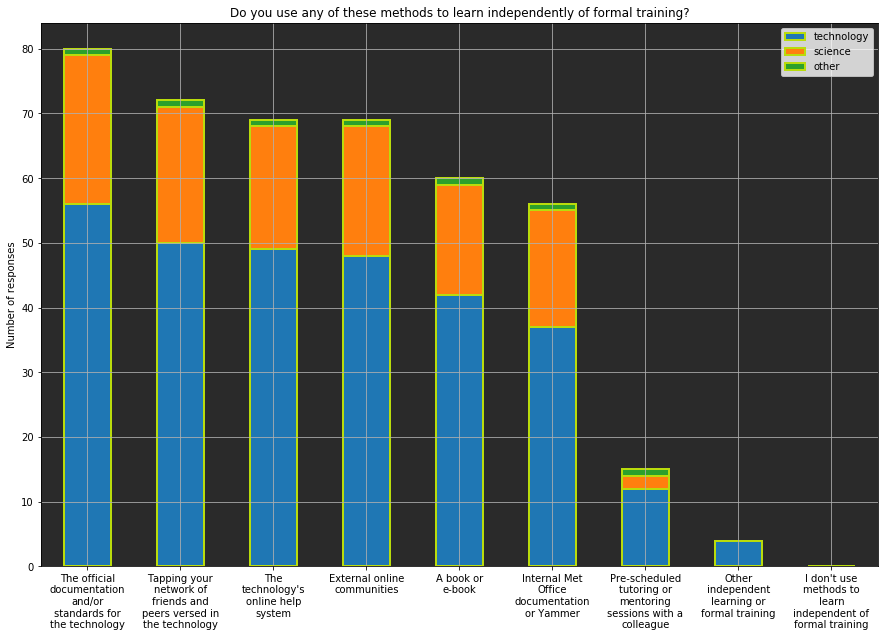

In [92]:
plot_stacked(otherlearningframe, 'Do you use any of these methods to learn independently of formal training?')

In [81]:
Newdf.rename(index=str, columns={'29 : Why would you engage in independent learning? I find it enjoyable': "I find it enjoyable",'29 : Why would you engage in independent learning? To improve my technical skills':'To improve my technical skills','29 : Why would you engage in independent learning? To improve my knowledge of a specific technology': 'To improve my knowledge of a specific technology','29 : Why would you engage in independent learning? To improve my ability to work within my team': 'To improve my ability to work within my team','29 : Why would you engage in independent learning? To build my professional network': "To build my professional network", '29 : Why would you engage in independent learning? To increase my opportunities at work': "To increase my opportunities at work",'29 : Why would you engage in independent learning? Other, please specify': "Other reasons for engaging in independent learning",'29 : Why would you engage in independent learning? Other, please specifycomment': "Specified other reasons for engaging in independent learning"}, inplace=True)

In [82]:
list(Newdf.iloc[:, -26:-19].columns)

['I find it enjoyable',
 'To improve my technical skills',
 'To improve my knowledge of a specific technology',
 'To improve my ability to work within my team',
 'To build my professional network',
 'To increase my opportunities at work',
 'Other reasons for engaging in independent learning']

In [83]:
def get_specific_reason(department):    
    specificdict = {} 
    tempdf = Newdf.loc[Newdf['1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?'] == department]
    for column in ['I find it enjoyable',
 'To improve my technical skills',
 'To improve my knowledge of a specific technology',
 'To improve my ability to work within my team',
 'To build my professional network',
 'To increase my opportunities at work',
 'Other reasons for engaging in independent learning']:
        length = len(tempdf.loc[tempdf[column] == "yes"])  
        specificdict[column] = length
    return specificdict

In [96]:
technologyreason = get_specific_reason('technology')
sciencereason = get_specific_reason('science')
otherreason = get_specific_reason('other')
reasondict = {'technology': technologyreason, 'science': sciencereason, 'other': otherreason}
reasonframe = pd.DataFrame.from_dict(reasondict)
reasonframe.sort_values(["technology"], ascending=False, inplace=True)
reasonframe

,technology,science,other
To improve my technical skills,61,22,1
To improve my knowledge of a specific technology,58,22,1
I find it enjoyable,50,14,1
To improve my ability to work within my team,47,17,1
To increase my opportunities at work,32,10,1
To build my professional network,23,1,1
Other reasons for engaging in independent learning,0,0,0


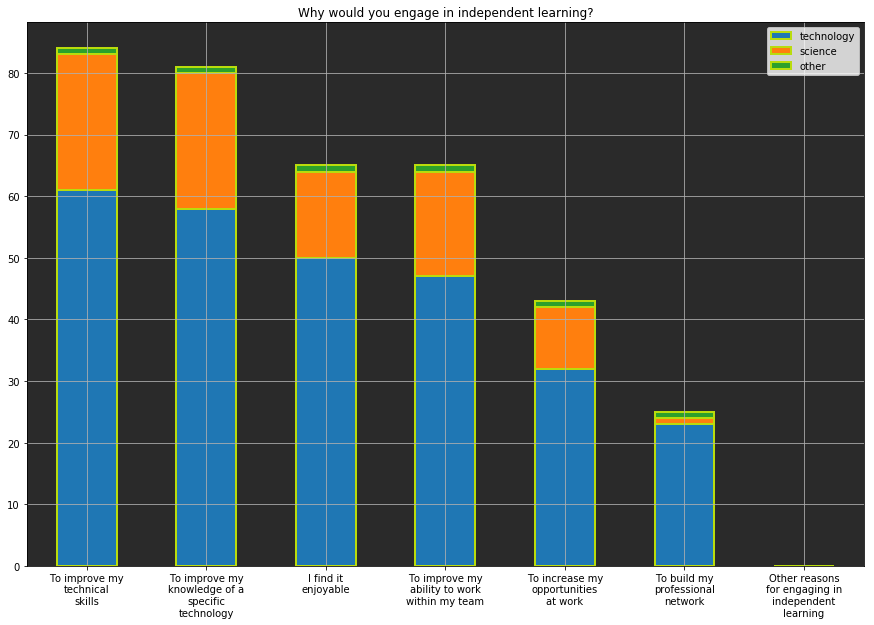

In [97]:
plot_stacked(reasonframe, "Why would you engage in independent learning?")

In [126]:
Newdf.rename(index=str, columns={'37 : What equipment do you use to stay comfortable whilst working? Ergonomic keyboard or mouse': "Ergonomic keyboard or mouse",'37 : What equipment do you use to stay comfortable whilst working? Standing desk': "Standing desk",'37 : What equipment do you use to stay comfortable whilst working? Wrist/hand supports or braces': "Wrist/hand supports or braces", '37 : What equipment do you use to stay comfortable whilst working? Fatigue-relieving floor mat': "Fatigue-relieving floor mat",'37 : What equipment do you use to stay comfortable whilst working? I do not use any equipment to stay comfortable whilst working': "I do not use any equipment to stay comfortable whilst working",'37 : What equipment do you use to stay comfortable whilst working? Other, please specify': "Other equipment", '37 : What equipment do you use to stay comfortable whilst working? Other, please specifycomment': 'Specifed other equipment'}, inplace=True)

In [127]:
list(Newdf.iloc[:, -6:].columns.values)

['Standing desk',
 'Wrist/hand supports or braces',
 'Fatigue-relieving floor mat',
 'I do not use any equipment to stay comfortable whilst working',
 'Other equipment',
 'Specifed other equipment']

In [128]:
def get_specific_equipment(department):    
    specificdict = {} 
    tempdf = Newdf.loc[Newdf['1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?'] == department]
    for column in list(Newdf.iloc[:, -6:-1].columns.values):
        length = len(tempdf.loc[tempdf[column] == "yes"])  
        specificdict[column] = length
    return specificdict

In [129]:
technologyequipment = get_specific_equipment('technology')
scienceequipment = get_specific_equipment('science')
otherequipment = get_specific_equipment('other')
equipmentdict = {'technology': technologyequipment, 'science': scienceequipment, 'other': otherequipment}
equipmentframe = pd.DataFrame.from_dict(equipmentdict).reindex(['Standing desk', 'Wrist/hand supports or braces', 'Fatigue-relieving floor mat','Other equipment', 'I do not use any equipment to stay comfortable whilst working'])
equipmentframe

,technology,science,other
Standing desk,4,1,0
Wrist/hand supports or braces,11,6,0
Fatigue-relieving floor mat,1,0,0
Other equipment,8,5,1
I do not use any equipment to stay comfortable whilst working,35,13,0


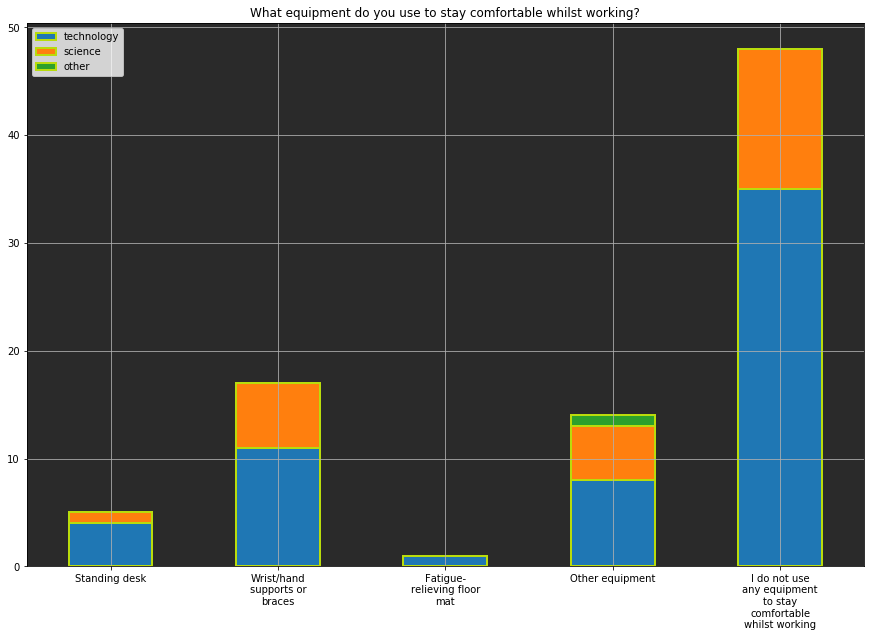

In [130]:
plot_stacked(equipmentframe, 'What equipment do you use to stay comfortable whilst working?')

In [131]:
Newdf['Specifed other equipment'].value_counts().to_frame()

,Specifed other equipment
nan,81
foot rest,3
"special chair because i've got a painful scar on my behind (not really, it's on my tailbone, but it just sounds a bit weird if i say i've got a scar between my buttcheeks)",1
coffee,1
i'd like to have a touch pad rather than an odd ball-mouse!!,1
laptop riser,1
height adjustable (but not standing) desk and chair.,1
why do you want to know this?,1
desk at specific height; chair with adequate height + no arms,1
good chair & desk or bench,1


In [133]:
Newdf['Specifed other equipment'] = Newdf['Specifed other equipment'].replace(["special chair because i've got a painful scar on my behind (not really, it's on my tailbone, but it just sounds a bit weird if i say i've got a scar between my buttcheeks)", "adjustable chair", "a supportive chair", "height adjustable (but not standing) desk and chair.", "good chair & desk or bench", "desk at specific height; chair with adequate height + no arms", "seat wedge, lowered desk, extra small keyboard and mouse"], "special chair and/or desk")

In [149]:
Otherequipmentframe = Newdf['Specifed other equipment'].value_counts().to_frame().reset_index()

In [150]:
Otherequipmentframe

,index,Specifed other equipment
0,nan,81
1,special chair and/or desk,7
2,foot rest,3
3,why do you want to know this?,1
4,i'd like to have a touch pad rather than an od...,1
5,laptop riser,1
6,coffee,1


In [151]:
Otherequipmentframe = Otherequipmentframe.drop(Otherequipmentframe.index[0])
Otherequipmentframe = Otherequipmentframe.drop(Otherequipmentframe.index[2])

In [154]:
Otherequipmentframe['index'] = Otherequipmentframe['index'].replace("i'd like to have a touch pad rather than an odd ball-mouse!!", "touch pad / mouse / keyboard")

In [155]:
Otherequipmentframe.set_value('4', )

,index,Specifed other equipment
1,special chair and/or desk,7
2,foot rest,3
4,touch pad / mouse / keyboard,1
5,laptop riser,1
6,coffee,1
